# Exploration of the data collected on Vestiaire Collective

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
sns.set_theme(style="whitegrid")

In [5]:
plt.rcParams["figure.figsize"] = (10, 6)

In [6]:
file_path = "C:/Users/pemma/OneDrive - Université de Tours/Mécen/M2/S1/02 - Machine Learning/05 - Projet/ML_Vestiaire_Collective/backup/vc_data.pkl"

In [7]:
data  = pd.read_pickle(file_path)

In [8]:
data.head()

,id,url,num_likes,price,we_love_tag,online_date,gender,category,sub_category,designer,condition,material,color,size,location
0,19126896,https://fr.vestiairecollective.com//women-shoe...,7,180.00,True,09/11/2021,women,shoes,ankle boots,acne studios,very good condition,leather,black,39,italy
1,19181389,https://fr.vestiairecollective.com//women-clot...,1,40.55,True,12/11/2021,women,clothing,jeans,acne studios,good condition,denim - jeans,navy,30,poland
2,19182029,https://fr.vestiairecollective.com//men-clothi...,6,332.50,True,12/11/2021,men,clothing,coats,acne studios,good condition,wool,black,l,denmark
3,19132670,https://fr.vestiairecollective.com//men-clothi...,3,45.00,False,09/11/2021,men,clothing,jeans,acne studios,"never worn, with tag",cotton,grey,28,germany
4,19118182,https://fr.vestiairecollective.com//women-clot...,9,105.00,False,09/11/2021,women,clothing,dresses,acne studios,very good condition,linen,black,s,germany


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10409 entries, 0 to 43
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10409 non-null  int64  
 1   url           10409 non-null  object 
 2   num_likes     10409 non-null  int64  
 3   price         10409 non-null  float64
 4   we_love_tag   10409 non-null  bool   
 5   online_date   10409 non-null  object 
 6   gender        10409 non-null  object 
 7   category      10409 non-null  object 
 8   sub_category  10409 non-null  object 
 9   designer      10409 non-null  object 
 10  condition     10409 non-null  object 
 11  material      10409 non-null  object 
 12  color         10409 non-null  object 
 13  size          10409 non-null  object 
 14  location      10409 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(11)
memory usage: 1.2+ MB


## Description of the `price` target variable 

In [10]:
data.price.describe()

count    10409.000000
mean       410.616666
std        678.736446
min         16.000000
25%        130.000000
50%        250.000000
75%        450.000000
max      25000.000000
Name: price, dtype: float64

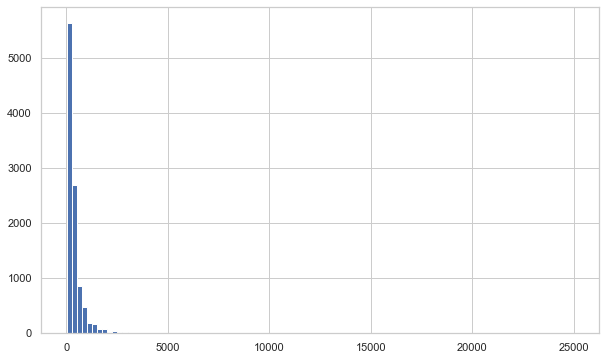

In [11]:
data.price.hist(bins = 100); 

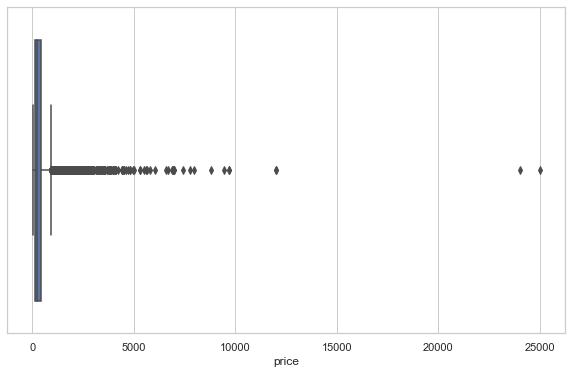

In [12]:
sns.boxplot(x=data.price); 

In [13]:
price_quantiles = np.quantile(a=data.price.values, q=np.linspace(0, 1, 5))
price_quantiles

array([1.6e+01, 1.3e+02, 2.5e+02, 4.5e+02, 2.5e+04])

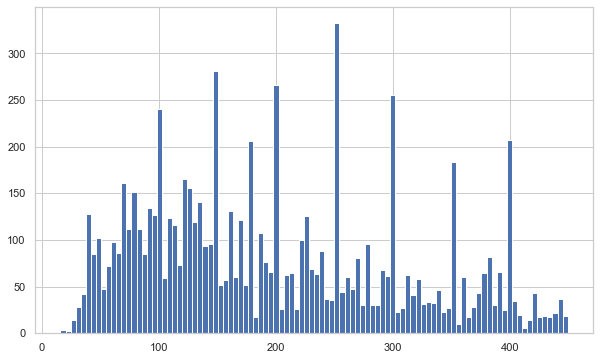

In [14]:
data.loc[data.price < price_quantiles[3], "price"].hist(bins=100); 

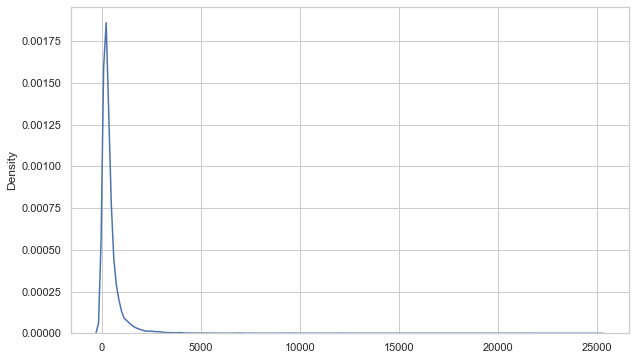

In [15]:
sns.kdeplot(data.price.values); 

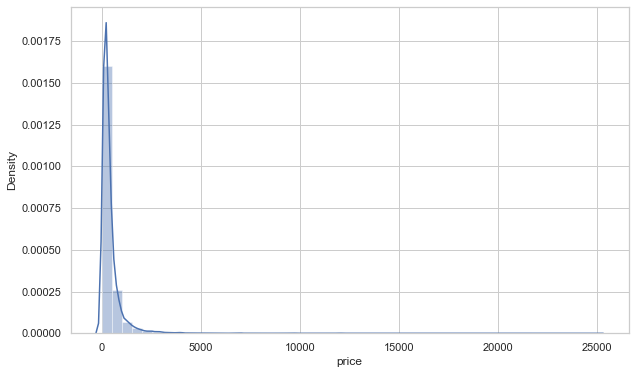

In [16]:
sns.distplot(data["price"]); 

In [17]:
# boundary upper price value
upper_band = data.price.mean() + 4*data.price.std()

In [18]:
outliers = data.loc[data.price > 5000, ]
outliers.shape

(25, 15)

In [19]:
data = data.loc[data.price < 5000]

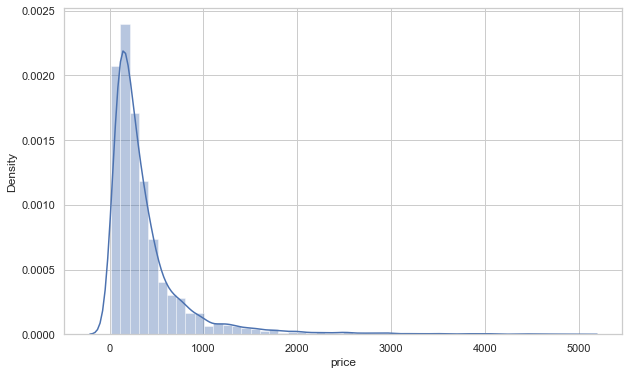

In [20]:
sns.distplot(data.price); 

## Multivariate statistics

Visualize relationships between `price` and the other features.

In [21]:
data.columns

Index(['id', 'url', 'num_likes', 'price', 'we_love_tag', 'online_date',
       'gender', 'category', 'sub_category', 'designer', 'condition',
       'material', 'color', 'size', 'location'],
      dtype='object')

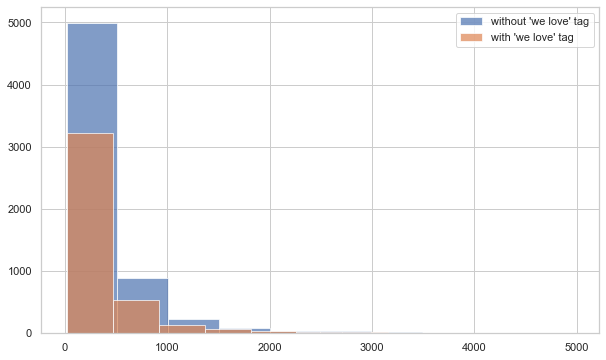

In [22]:
fig, ax = plt.subplots()
ax.hist(
    data[data.we_love_tag == False].price, label="without 'we love' tag", 
    alpha=.7
)
ax.hist(
    data[data.we_love_tag == True].price,
    label="with 'we love' tag",
    alpha=.7
)
ax.legend();  

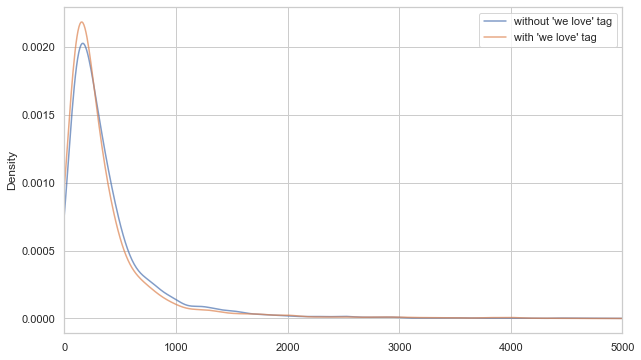

In [23]:
data[data.we_love_tag == False].price.plot( 
    kind="density",
    label="without 'we love' tag", 
    alpha=.7
)
data[data.we_love_tag == True].price.plot(
    kind="density",
    label="with 'we love' tag",
    alpha=.7
)
plt.xlim(0, 5000)
plt.legend();  

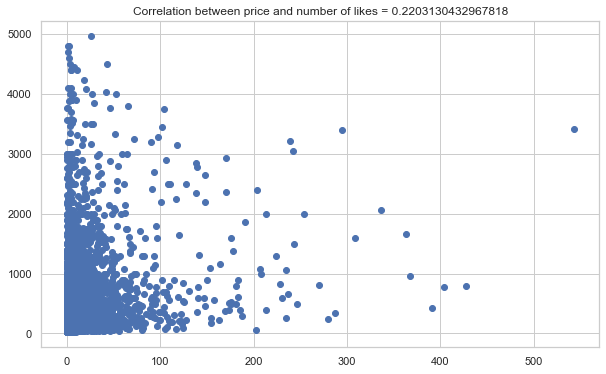

In [24]:
corr = np.corrcoef(data.num_likes, data.price)[1][0]
plt.scatter(data.num_likes, data.price)
plt.title(f"Correlation between price and number of likes = {corr}");

In [37]:
var = "condition"
fig = px.histogram(
    data, 
    x="price", 
    color=var
)
fig.show()